Making samples


In [166]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = np.array([rng() for _ in range(1000)])

### Problem 1
Implement serial test and apply to a `samples`

In [107]:
k = 20
hist = np.histogram2d(samples[::2], samples[1::2], bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1)])[0]
f_obs = hist.flatten()
f_exp = np.full_like(f_obs, f_obs.sum() / (k ** 2))

stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=np.float64(391.2), pvalue=np.float64(0.6003664860752091))

### Problem 2*
Implement permutation test and apply to a `samples`

In [ ]:
###

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [105]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

samples_bad = np.array([rng_bad() for _ in range(1000)])

In [ ]:
k = 20
hist = np.histogram2d(samples_bad[::2], samples_bad[1::2], bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1)])[0]
f_obs_b = hist.flatten()
f_exp_b  = np.full_like(f_obs_b, f_obs_b.sum() / (k ** 2))

print('rng_bad : ', stats.chisquare(f_obs_b, f_exp_b))
print('rng_good : ', stats.chisquare(f_obs, f_exp)) # из problem 1

rng_bad :  Power_divergenceResult(statistic=np.float64(456.79999999999995), pvalue=np.float64(0.02395205738027778))
rng_good :  Power_divergenceResult(statistic=np.float64(391.2), pvalue=np.float64(0.6003664860752091))


In [109]:

samples_bad = np.array([rng_bad() for _ in range(3000)])
samples_good = np.array([rng() for _ in range(3000)])

dots_3d_bad = np.array([[samples_bad[i], samples_bad[i+1], samples_bad[i+2]]
    for i in range(0, len(samples_bad), 3)])

dots_3d_good = np.array([[samples_good[i], samples_good[i+1], samples_good[i+2]]
    for i in range(0, len(samples_good), 3)])

hist = np.histogramdd(dots_3d_bad, bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1),  np.linspace(0 , 1, k + 1)])[0]
f_obs_b = hist.flatten()
f_exp_b = np.full_like(f_obs_b, f_obs_b.sum() / (k ** 3))

hist = np.histogramdd(dots_3d_good, bins = [np.linspace(0 , 1, k + 1), np.linspace(0 , 1, k + 1),  np.linspace(0 , 1, k + 1)])[0]
f_obs_g = hist.flatten()
f_exp_g = np.full_like(f_obs_g, f_obs_g.sum() / (k ** 3))

print('rng_bad : ', stats.chisquare(f_obs_b, f_exp_b))
print('rng_good : ', stats.chisquare(f_obs_g, f_exp_g)) 

rng_bad :  Power_divergenceResult(statistic=np.float64(8648.0), pvalue=np.float64(2.81055634678058e-07))
rng_good :  Power_divergenceResult(statistic=np.float64(8088.0), pvalue=np.float64(0.23999339083089932))


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

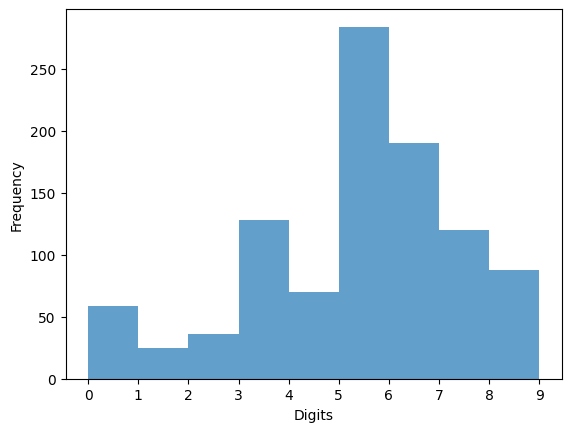

In [138]:
w = np.array([rng() for _ in range(10)])
weights = w / sum(w) # sum weights из условия != 1

digits = np.arange(10)
sort_index = np.argsort(weights)

sample = np.random.choice(digits[sort_index], size = 1000, p = weights[sort_index])
plt.hist(sample, bins = np.arange(0, 10, 1), alpha = 0.7)

plt.ylabel("Frequency")
plt.xlabel("Digits")
plt.xticks(digits)
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

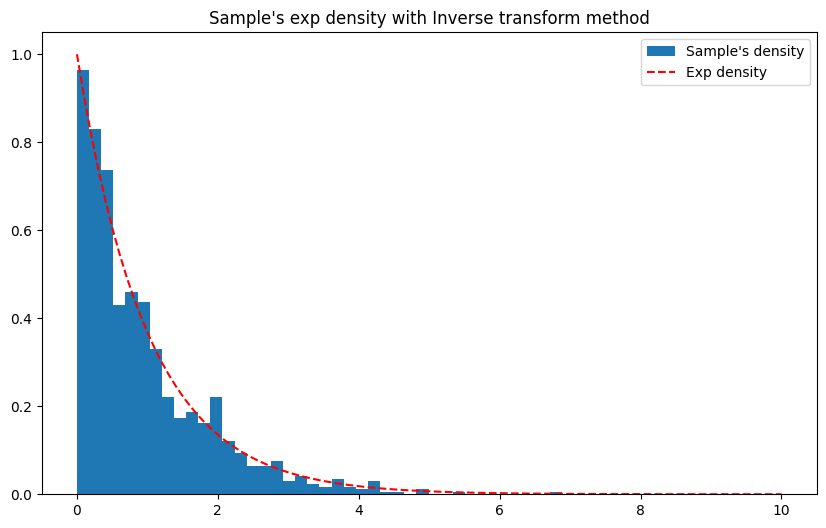

In [165]:
sample = np.array([rng() for _ in range(1000)])

exp_sample = -np.log(1 - sample) # lambda = 1

x = np.linspace(0, 10, 100)

plt.figure(figsize = (10, 6))
plt.hist(exp_sample, bins = 40, alpha = 1, density = True, label = "Sample's density")
plt.plot(x, np.exp(-x), "r--", label = "Exp density")
plt.title("Sample's exp density with Inverse transform method")
plt.legend()
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

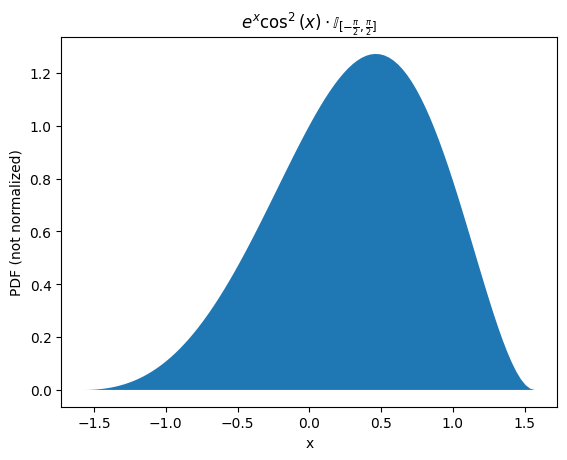

In [139]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

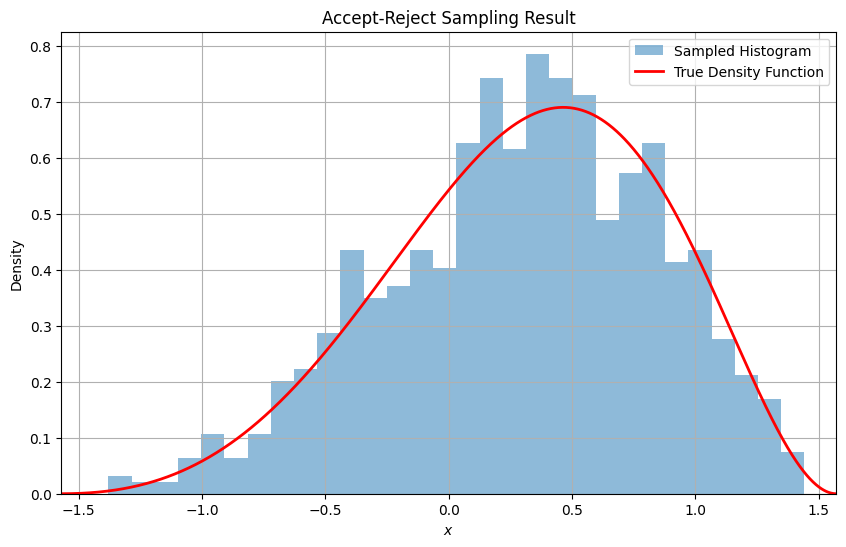

In [187]:
from scipy.integrate import quad

#reminder : rnd() - uniform disrtibution
#doing normalized density
def f(x):
    return (np.exp(x) * (np.cos(x) ** 2))

integral = quad(f, -np.pi / 2, np.pi / 2)[0]

def f_density(x):
    return f(x) / integral 

x = np.linspace(-np.pi/2, np.pi/2, 1000)
f_max = np.max(f_density(x))

#accept-reject method
sampled_points = []
while len(sampled_points) < 1000:
    candidate = -np.pi / 2 + rng() * np.pi
    u = rng() * f_max
    if u <= f_density(candidate):
        sampled_points.append(candidate)

plt.figure(figsize=(10, 6))
plt.hist(sampled_points, bins=30, density=True, alpha=0.5, label='Sampled Histogram')

true_density = f_density(x)
plt.plot(x, true_density, color='red', lw=2, label='True Density Function')

# Оформление графика
plt.xlim([-np.pi/2, np.pi/2])
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Accept-Reject Sampling Result')
plt.legend()
plt.grid(True)
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

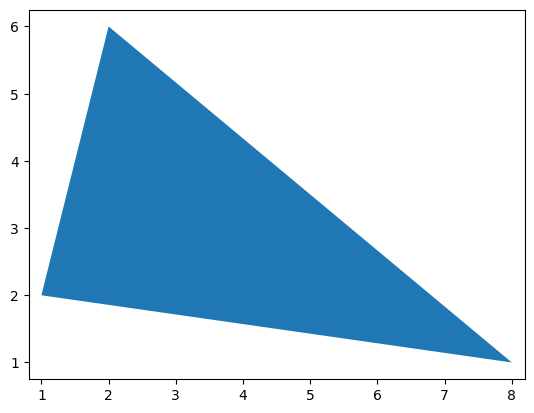

In [208]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

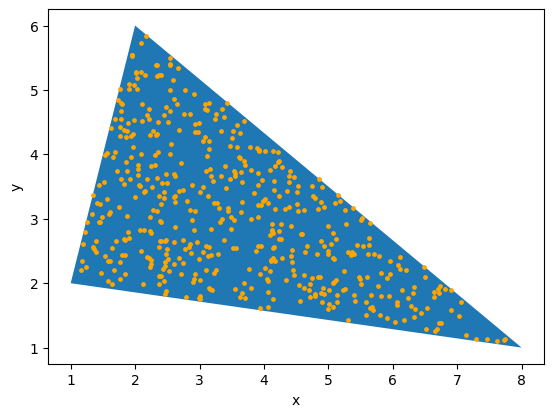

In [251]:
A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])

N = 500
u = np.array([rng() for _ in range(N)])
v = np.array([rng() for _ in range(N)])

# через маски массивов
swap = u + v > 1
u[swap] = 1 - u[swap]
v[swap] = 1 - v[swap]

points = (1 - u - v)[:, None] * A + u[:, None] * B + v[:, None] * C

fig, ax = plt.subplots()
polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
ax.add_patch(polygon)
ax.scatter(points[:,0], points[:,1], color = 'orange', s = 6)
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

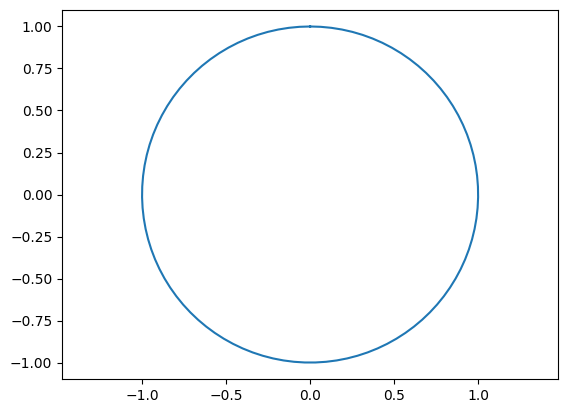

In [253]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

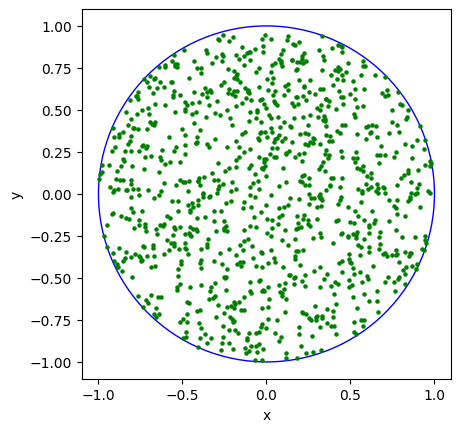

In [266]:

def points_inside_circle(n):
  r = np.sqrt(np.array([rng() for _ in range(n)])) 
  phi = np.array([rng() * 2*np.pi for _ in range(n)])
  x = r * np.cos(phi)
  y = r * np.sin(phi)
  return x, y

x, y = points_inside_circle(n)

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='blue', facecolor='none')
ax.add_patch(circle)
ax.scatter(x, y, s=5, color='green')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

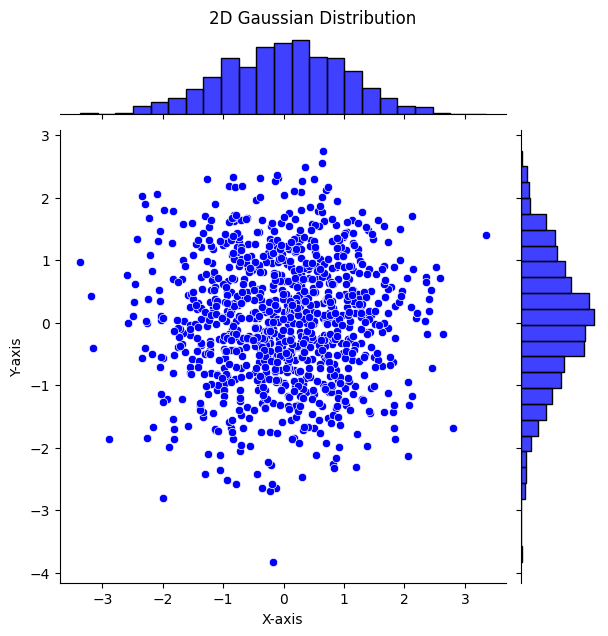

In [252]:
import seaborn as sns

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

In [ ]:
###

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
###